In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INITIAL_PROPELANT_WEIGHT = 0.30  #Kg
SAMPLE_RATE = 80
time_constant = 1/SAMPLE_RATE
dataFile = 'March_02.csv'

In [3]:
with open(dataFile, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [4]:
a = np.array(data)
a = a.astype(float)
filtered = a[np.where(a > 0)]

In [5]:
filtered = np.append(filtered, 0)
filtered = np.insert(filtered, 0, 0)
filtered

array([ 0.      ,  3.      ,  5.431797,  7.848   ,  8.841753,  6.608016,
        3.627738,  4.274217,  7.134813, 10.105281,  9.324405,  4.034853,
        1.586277,  5.569137,  7.499745,  9.061497,  9.392094,  5.466132,
        3.836691,  5.008005,  9.782532, 11.719026,  6.58251 ,  2.643795,
        3.702294,  7.356519, 10.84005 , 11.519883,  6.447132,  1.494063,
        3.666978,  7.631199, 11.421783, 11.817126,  5.30721 ,  1.403811,
        3.519828,  9.391113, 14.652216,  9.406809,  3.055815,  2.1582  ,
        6.030207, 11.447289, 14.120514,  8.664192,  1.554885,  2.896893,
        7.644933, 12.785373, 14.036148,  6.039036,  1.555866,  4.493961,
       11.447289, 17.254809,  8.481726,  1.266471,  4.203585,  5.875209,
       13.170906, 16.160994,  7.00434 ,  2.233737,  3.964221, 10.178856,
       16.819245, 13.062996,  4.461588,  1.768743,  3.430557,  8.630838,
       15.665589, 15.292809,  6.096915,  1.81485 ,  6.542289, 12.070224,
       19.48266 , 10.157274,  3.269673,  6.389253, 

In [6]:
#filtered = np.delete(filtered, [1,2,3,4,10])
burnTime = filtered.size * time_constant

In [7]:
t = np.linspace(0, burnTime, filtered.size)
thrust = filtered

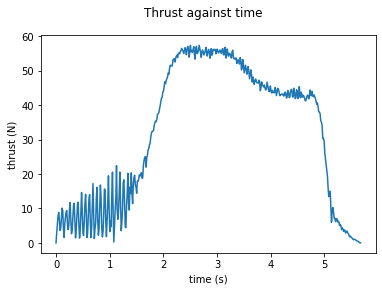

In [8]:
fig = plt.figure()
plt.plot(t, thrust)
fig.suptitle('Thrust against time')
plt.xlabel('time (s)')
plt.ylabel('thrust (N)')
fig.savefig('graph')

In [9]:
#total impulse
totalImpulse = np.sum(thrust) * time_constant
#specific impulse
specificImpulse = totalImpulse / INITIAL_PROPELANT_WEIGHT
#average thrust
avgThrust = totalImpulse / burnTime

In [10]:
def motorClass(totalImpulse):
    if totalImpulse > 5120:
        return 'M'
    elif totalImpulse > 2560:
        return 'L'
    elif totalImpulse > 1280:
        return 'K'
    elif totalImpulse > 640:
        return 'J'
    elif totalImpulse > 320:
        return 'I'
    elif totalImpulse > 160:
        return 'H'
    elif totalImpulse > 80:
        return 'G'
    elif totalImpulse > 40:
        return 'F'
    elif totalImpulse > 20:
        return 'E'
    elif totalImpulse > 10:
        return 'D'
    elif totalImpulse > 5:
        return 'C'
    elif totalImpulse > 2.5:
        return 'B'
    elif totalImpulse > 1.25:
        return 'A'
    elif totalImpulse > 0.625:
        return '1/2A'
    elif totalImpulse > 0.3126:
        return '1/4A'
    else:
        return 'micro'
    
Class = motorClass(totalImpulse)

In [11]:
st = "Total Impulse:\t\t{:.2f}\tN-sec \nSpecific Impulse:\t{:.2f}\tN-sec/Kg \nAverage Thrust:\t\t{:.2f}\tN"
print(st.format(totalImpulse, specificImpulse, avgThrust))
print("Motor Class:\t\t{}".format(Class))

Total Impulse:		179.37	N-sec 
Specific Impulse:	597.89	N-sec/Kg 
Average Thrust:		31.61	N
Motor Class:		H


In [12]:
#Generate Rasp File
filename = input("Enter rasp file name")
filename = filename + ".eng"
f = open(filename, "a")

Enter rasp file name March_02


In [13]:
motorName = Class + str(int(avgThrust))
diameter = input("Enter Motor Diameter (mm): ")
Length = input("Input motor Length (mm): ")
delays = input("Input motor delays separated by dashes or P(plugged) for none: ")
pWeight = input("Propellant Weight (Kg): ")
totalWeight = input("Motor Total Weight (Kg): ")
manufucturer = "NKJ"

Enter Motor Diameter (mm):  50
Input motor Length (mm):  106
Input motor delays separated by dashes or P(plugged) for none:  P
Propellant Weight (Kg):  0.3
Motor Total Weight (Kg):  0.6


In [14]:
#Write rasp file header
f.write("; NakujaProject" + motorName + "\n")
f.write("; from " + dataFile + "\n")
f.write("{} {} {} {} {} {} {} \n".format(motorName, diameter, Length, delays, pWeight, totalWeight, manufucturer))

26

In [15]:
thrustATime = np.array([t, thrust]).T
np.savetxt(f, thrustATime, delimiter=' ')

In [16]:
f.close()